# <u>Tut_8.1</u>

### Learning outcomes
* Decision Tree ML model
* Streamlit
* Homework

---

## Decision Tree ML model

* A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

* A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually

---

## Who would survive on Titanic?
<img src='../assets/img/decision_tree_titanic.jpg' width = '500'>

---

### Import libraries and modules

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools


### Load Titanic dataset

In [2]:
# We use url, but can also download and access it locally
dataset_path = 'https://raw.githubusercontent.com/Koldim2001/test_api/refs/heads/main/titanic.csv' 
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Select features

* We only select `Pclass`, `Age` and `Fare` features for the sake of demonstration of the model
* Maximising model prediction accuracy was not a goal of the present exercise
* In particular, we do not *one-hot* encode categorical features. We demonstrated this approach in the previous tutorials (linear and logistic regression models, when we weere studying health insurance and weather in Australia, respectively). Feep free to add hot-encoded features and see how prediction accuracy can be affected
* `Survived` column will be our **target**

In [5]:
df = df[['Survived', 'Pclass', 'Age', 'Fare']]  # The subset (columns) we selected for this project
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Data cleaning: drop lines where `Age`data are not available

In [6]:
df = df.dropna(subset=['Age'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [8]:
df.drop(columns='Survived')  # These are our features

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
885,3,39.0,29.1250
886,2,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


### Split dataset

In [9]:
# Splitdataset
train, test = train_test_split(df, test_size=0.2)

In [10]:
train.head()

,Survived,Pclass,Age,Fare
619,0,2,26.0,10.5000
819,0,3,10.0,27.9000
771,0,3,48.0,7.8542
85,1,3,33.0,15.8500
607,1,1,27.0,30.5000


### Build a helper function to plot Confusion Matrix

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plots confusion matrix
    cm - confusion matrix
    classes - class list
    normalize - normalize to 1 if True
    title - plot title
    cmap - color map
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Helper function to build and train Decision Tree model

In [12]:
def experiment(max_depth, min_samples_split):
    """
    Builds and trains Decision Tree model
    """
    # Build and train Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    # Calculate accuracy metrics
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("accuracy", acc)

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])

    # Classification report
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    # Save model in pickle format
    with open('../outputs/models/model_dt.pkl', 'wb') as f:
        pickle.dump(model, f)
        

### Define model <u>hyperparameters</u>

In [13]:
# Define model hyperparameters
max_depth = 5
min_samples_split = 150


accuracy 0.6853146853146853
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.73      0.82      0.77        92
    Survived       0.57      0.45      0.51        51

    accuracy                           0.69       143
   macro avg       0.65      0.63      0.64       143
weighted avg       0.67      0.69      0.68       143



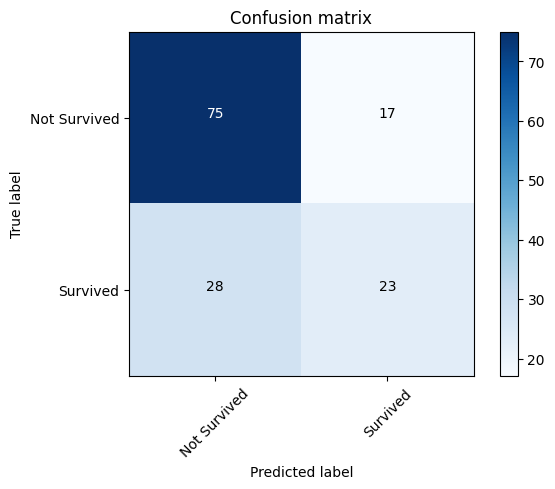

In [14]:
experiment(max_depth, min_samples_split)

### Prediction for a single person

In [15]:
# Load model from pkl
with open('../outputs/models/model_dt.pkl', 'rb') as f:
    model = pickle.load(f)

In [16]:
# Predict outcome of Titanic trip for a person
person = pd.DataFrame({
	'Pclass':[3],
	'Age':[55],
	'Fare':[7.2500]	
})

prediction = model.predict(person)
print(f"The model predicts {prediction}")

The model predicts [0]


In [17]:
if prediction == [1]:
    print ("This person is, the most likely, is a survivor.")
else:
    print("This person, the most likely, perished.")

This person, the most likely, perished.


---

### Again: what is the Decision Tree in the context of ML?

[Text(0.5, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.487\nsamples = 571\nvalue = [332, 239]'),
 Text(0.3, 0.75, 'Fare <= 51.931\ngini = 0.479\nsamples = 281\nvalue = [112, 169]'),
 Text(0.4, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'Age <= 17.5\ngini = 0.5\nsamples = 177\nvalue = [88, 89]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.3, 0.4166666666666667, 'Age <= 53.0\ngini = 0.496\nsamples = 160\nvalue = [87, 73]'),
 Text(0.2, 0.25, 'gini = 0.5\nsamples = 136\nvalue = [68, 68]'),
 Text(0.4, 0.25, 'gini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.4, 0.5833333333333334, 'gini = 0.355\nsamples = 104\nvalue = [24, 80]'),
 Text(0.7, 0.75, 'Age <= 5.5\ngini = 0.366\nsamples = 290\nvalue = [220, 70]'),
 Text(0.6, 0.8333333333333333, '  False'),
 Text(0.6, 0.5833333333333334, 'gini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Text(0.8, 0.5833333333333334, 'Fare <= 51.698\ngini = 0.332\nsamples = 266\nvalue = [210, 56]'),

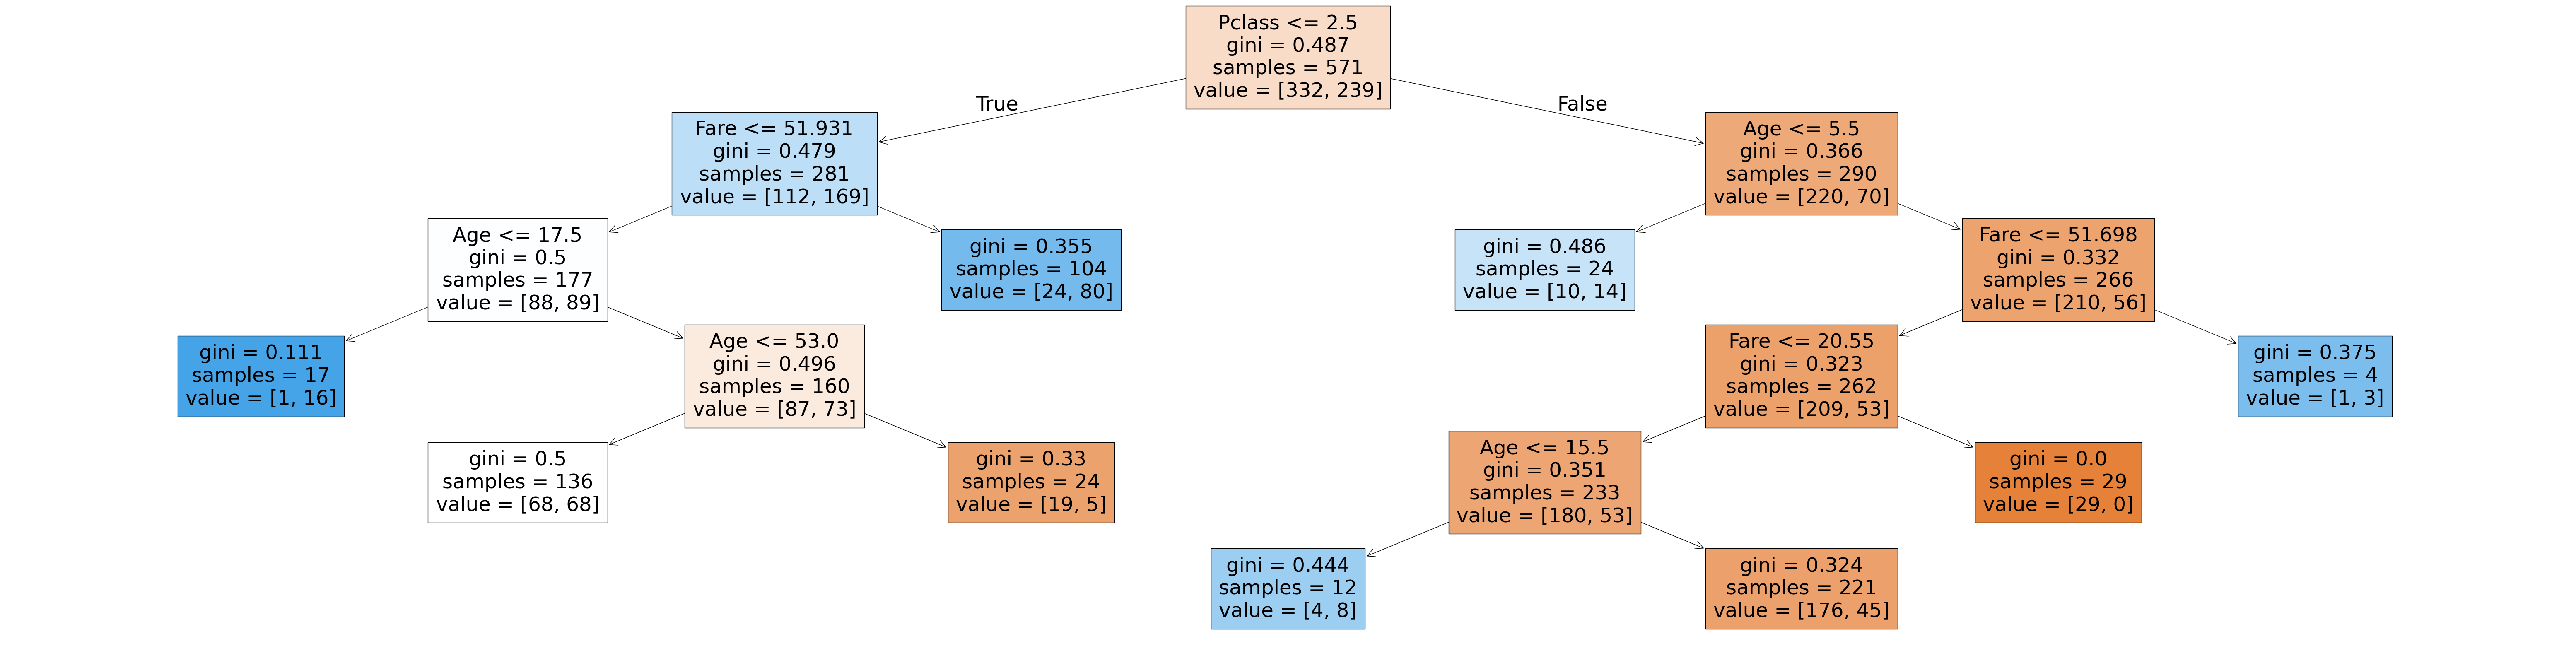

In [18]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=df.drop(columns='Survived').columns, max_depth=5, filled=True)


* Can you see how the model classifies a given input as a series of decisions?
* The tree is following any path from the root node down to a leaf will result in "Yes" or "No"
* Do you see how a decision tree differs from a logistic regression model?

**How a Decision Tree is Created**

* Note the `gini` value in each box
* This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split
* A lower Gini index indicates a better split
* A perfect split (only one class on each side) has a Gini index of 0. 
* **Gini Index** has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

*p* is proportion of the samples that belong to class *c* for a particular node

* Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one
* Then, it recursively performs an optimal split for the two portions


### Textual representation of our Decision Tree model

In [19]:
tree_text = export_text(model, max_depth=5, feature_names=df.drop(columns='Survived').columns)
print(tree_text)

|--- Pclass <= 2.50
|   |--- Fare <= 51.93
|   |   |--- Age <= 17.50
|   |   |   |--- class: 1
|   |   |--- Age >  17.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  53.00
|   |   |   |   |--- class: 0
|   |--- Fare >  51.93
|   |   |--- class: 1
|--- Pclass >  2.50
|   |--- Age <= 5.50
|   |   |--- class: 1
|   |--- Age >  5.50
|   |   |--- Fare <= 51.70
|   |   |   |--- Fare <= 20.55
|   |   |   |   |--- Age <= 15.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  15.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  20.55
|   |   |   |   |--- class: 0
|   |   |--- Fare >  51.70
|   |   |   |--- class: 1



### Feature importance

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

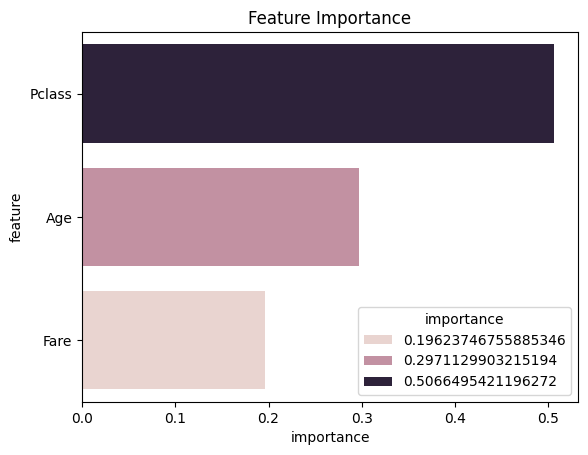

In [20]:
importance_df = pd.DataFrame({
    'feature': df.drop(columns='Survived').columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='importance')

---

## Hyperparameters, Underfitting and Overfitting

* Our decision tree classifier can memorise all training examples, leading to a 100% training accuracy (just like a student who memorised all possible exam answers)
* Yet validation accuracy will be very poor due to poor **generalisation**
* This phenomenon is called **overfitting**, and in this section, we'll have a closer look at it
* The `DecisionTreeClassifier` is a suitable model to demonstrate overfitting
* Overfitting is much more common than underfitting

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


### `max_depth` optimisation (example)

In [21]:
def max_depth_error(md):
    """
    Returns training and validation (test) accuracy as a function of tree maximum depth
    """
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train.drop(columns='Survived'), train['Survived'])
    train_acc = 1 - model.score(train.drop(columns='Survived'), train['Survived'])
    test_acc = 1 - model.score(test.drop(columns='Survived'), test['Survived'])
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [22]:
errors_list = []

for md in range(1, 21):
    result = max_depth_error(md)
    errors_list.append(result)

errors_df = pd.DataFrame(errors_list)

In [23]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.318739,0.398601
1,2,0.311734,0.398601
2,3,0.267951,0.300699
3,4,0.260946,0.293706
4,5,0.227671,0.342657
5,6,0.217163,0.314685
6,7,0.203152,0.342657
7,8,0.185639,0.307692
8,9,0.168126,0.328671
9,10,0.148862,0.356643


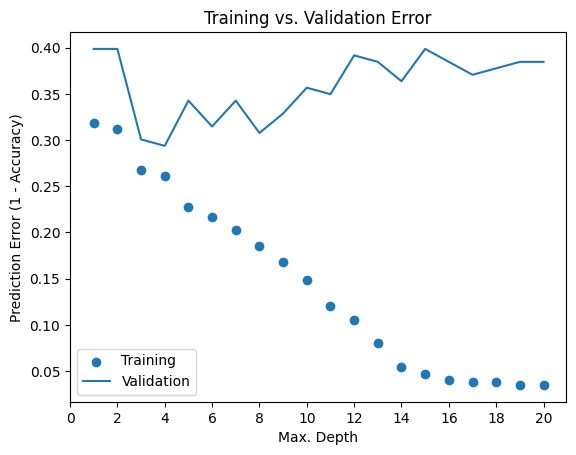

In [24]:
plt.figure()
plt.scatter(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])
plt.show()

In [25]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

---

## Streamlit
### how to share your model
[Streamlit](https://streamlit.io/)

<svg   viewBox="0 0 128 128"   xmlns="http://www.w3.org/2000/svg"   xmlns:svg="http://www.w3.org/2000/svg" width="250">  <path     d="M 63.992579,72.521325 41.553732,60.660321 2.6034211,40.074058 c -0.035557,-0.03555 -0.1066637,-0.03555 -0.1422174,-0.03555 -1.4221913,-0.675528 -2.87993927,0.746641 -2.3466152,2.168863 l 19.8466965,50.619383 0.0035,0.0109 c 0.02134,0.04994 0.03912,0.09944 0.06046,0.149334 0.814189,1.887956 2.591938,3.054 4.526143,3.512657 0.163538,0.03587 0.280527,0.06782 0.476917,0.107073 0.195451,0.04351 0.46881,0.10282 0.703471,0.120745 0.03912,0.0033 0.07467,0.0033 0.113789,0.0065 h 0.02846 c 0.02841,0.0044 0.05687,0.0044 0.08533,0.0076 h 0.03908 c 0.02491,0.0033 0.05333,0.0033 0.07824,0.0033 h 0.04621 c 0.02846,0.0044 0.05687,0.0044 0.08533,0.0044 v 0 c 25.135232,2.740415 50.493562,2.740415 75.628755,0 v 0 c 0.30207,0 0.59732,-0.0145 0.88147,-0.04263 0.0926,-0.0109 0.18133,-0.02137 0.27051,-0.03195 0.0107,-0.0044 0.0247,-0.0044 0.0354,-0.0076 0.0606,-0.0076 0.12074,-0.01788 0.18133,-0.02857 0.0887,-0.0109 0.17791,-0.02813 0.26666,-0.04612 0.17791,-0.03925 0.25855,-0.06738 0.50004,-0.1506 0.24106,-0.08276 0.64169,-0.22784 0.89214,-0.348585 0.25087,-0.120746 0.42452,-0.236792 0.63444,-0.368201 0.2594,-0.163837 0.50644,-0.331086 0.75689,-0.518812 0.10794,-0.08276 0.18175,-0.135683 0.25983,-0.210351 l -0.0427,-0.02475 z"     fill="#ff4b4b"     id="path14"     style="stroke-width:0.426657" />  <path     d="m 125.44606,40.07457 h -0.0354 L 86.445785,60.660834 108.10586,92.919776 127.90272,42.207855 v -0.07109 c 0.49791,-1.493346 -1.0308,-2.844391 -2.45668,-2.062205"     fill="#7d353b"     id="path16"     style="stroke-width:0.426657" />  <path     d="m 66.069117,30.286053 c -0.995816,-1.454191 -3.164512,-1.454191 -4.124488,0 L 41.553817,60.660572 63.992579,72.521761 106.51616,94.995458 c 0.26709,-0.261532 0.48127,-0.516249 0.7074,-0.785468 0.31999,-0.394664 0.61865,-0.817481 0.8819,-1.290639 L 86.445379,60.660572 Z"     fill="#bd4043"     id="path18"     style="stroke-width:0.426657" /></svg>

---

## Homework

* Carried over from **tut_7.1**